# Google Doc
https://docs.google.com/document/d/1ORcSEpvTBsdEwbvB7LTivoPQ6RovkRQi-2k7OxW-5ko/edit?usp=sharing

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

In [68]:
import pandas as pd
import lucem_illud
import numpy as np
import math
import sklearn.feature_extraction.text
import sklearn.feature_extraction
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
import matplotlib.pyplot as plt
import gensim
import wordcloud

In [51]:
df = pd.read_csv("/content/drive/MyDrive/final project data/BLM.csv")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,m_content,m_content_url,m_content_id,m_images,m_videos,r_comment_num,g_publish_time,r_like_num,r_trans_num,u_id,keyword,in_reply_to_screen_name,in_reply_to_status_id,u_nickname,u_area,screen_name,text
0,0,http://twitpic.com/gh4w - Wolf-dieter ring #blm,https://twitter.com/jbenno/status/962079197,962079197,NaN,NaN,0,2008-10-16,0.0,0.0,10177792,BLM,NaN,None,Joerg Blumtritt,Abu Dhabi,jbenno,- Wolf-dieter ring #blm
1,1,http://twitpic.com/gh3o - Hier @presseschauer ...,https://twitter.com/jbenno/status/962066767,962066767,NaN,NaN,0,2008-10-16,0.0,0.0,10177792,BLM,NaN,None,Joerg Blumtritt,Abu Dhabi,jbenno,- Hier und #blm
2,2,@furukama the leagel dabate on trust and commu...,https://twitter.com/jbenno/status/962226263,962226263,NaN,NaN,0,2008-10-16,0.0,0.0,10177792,BLM,furukama,962226263,Joerg Blumtritt,Abu Dhabi,jbenno,the leagel dabate on trust and communications...
3,3,http://twitpic.com/gno2 - Noshow-tisch #blm,https://twitter.com/jbenno/status/963782003,963782003,NaN,NaN,0,2008-10-17,0.0,0.0,10177792,BLM,NaN,None,Joerg Blumtritt,Abu Dhabi,jbenno,- Noshow-tisch #blm
4,4,http://twitpic.com/gno6 - Buffet #blm,https://twitter.com/jbenno/status/963782458,963782458,NaN,NaN,0,2008-10-17,0.0,0.0,10177792,BLM,NaN,None,Joerg Blumtritt,Abu Dhabi,jbenno,- Buffet #blm


In [52]:
# get rid of duplicates
df = df.drop_duplicates().reset_index().drop(['index', 'Unnamed: 0'], axis = 1)

In [54]:
# get rid of rows without text
df = df.dropna(subset = ['text'])

In [ ]:
# tokenize and normalize the tokens
df['tokenized_text'] = df['text'].apply(lambda x: lucem_illud.word_tokenize(x))
df['normalized_text'] = df['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))

In [16]:
df.to_csv('/content/drive/MyDrive/final project data/mlb_tokenized.csv')

In [17]:
df.head()

,m_content,m_content_url,m_content_id,m_images,m_videos,r_comment_num,g_publish_time,r_like_num,r_trans_num,u_id,...,u_area,screen_name,text,target,year,tokenized_text,normalized_text,tokenized_sents,normalized_sents,after
0,http://twitpic.com/gh4w - Wolf-dieter ring #blm,https://twitter.com/jbenno/status/962079197,962079197,NaN,NaN,0,2008-10-16,0,0,10177792,...,Abu Dhabi,jbenno,- Wolf-dieter ring #blm,0,-12,"[Wolf, dieter, ring, blm]","[wolf, dieter, ring, blm]","[[Wolf, dieter, ring, blm]]","[[wolf, dieter, ring, blm]]",0
1,http://twitpic.com/gh3o - Hier @presseschauer ...,https://twitter.com/jbenno/status/962066767,962066767,NaN,NaN,0,2008-10-16,0,0,10177792,...,Abu Dhabi,jbenno,- Hier und #blm,0,-12,"[Hier, und, blm]","[hier, und, blm]","[[Hier, und, blm]]","[[hier, und, blm]]",0
2,@furukama the leagel dabate on trust and commu...,https://twitter.com/jbenno/status/962226263,962226263,NaN,NaN,0,2008-10-16,0,0,10177792,...,Abu Dhabi,jbenno,the leagel dabate on trust and communications...,0,-12,"[the, leagel, dabate, on, trust, and, communic...","[leagel, dabate, trust, communication, law, no...","[[the, leagel, dabate, on, trust, and, communi...","[[leagel, dabate, trust, communication, law, n...",0
3,http://twitpic.com/gno2 - Noshow-tisch #blm,https://twitter.com/jbenno/status/963782003,963782003,NaN,NaN,0,2008-10-17,0,0,10177792,...,Abu Dhabi,jbenno,- Noshow-tisch #blm,0,-12,"[Noshow, tisch, blm]","[noshow, tisch, blm]","[[Noshow, tisch, blm]]","[[noshow, tisch, blm]]",0
4,http://twitpic.com/gno6 - Buffet #blm,https://twitter.com/jbenno/status/963782458,963782458,NaN,NaN,0,2008-10-17,0,0,10177792,...,Abu Dhabi,jbenno,- Buffet #blm,0,-12,"[Buffet, blm]","[buffet, blm]","[[Buffet, blm]]","[[buffet, blm]]",0


In [18]:
# convert the date to pandas datetime object
df['g_publish_time']= pd.to_datetime(df['g_publish_time'])

In [19]:
# create a after column that has the classification label for each row
after = []
for i in df.iloc:
  if i.g_publish_time > pd.to_datetime('2020-05-25'):
    after.append(1)
  elif i.g_publish_time == pd.to_datetime('2020-05-25'):
    after.append(2)
  else:
    after.append(0)

df['after'] = after

In [20]:
# remove the tweets on 2020-05-25
df_cleaned = df[df['after'] != 2]

In [21]:
df_sorted = df_cleaned.sort_values('g_publish_time')

In [22]:
df_sorted.after.value_counts()

0    218233
1     60922
Name: after, dtype: int64

In [23]:
# balance the dataset
df_balanced = df_sorted[156491:]

In [24]:
df_balanced.after.value_counts()

0    61742
1    60922
Name: after, dtype: int64

In [27]:
# use Tf-Idf to vectorize the tweet text
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(df_balanced['text'])

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(TFVects, df_balanced['after'], test_size=0.33, random_state=42)

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [30]:
rf.score(X_train, y_train)

0.9420690158668354

In [31]:
rf.score(X_test, y_test)

0.8509881422924901

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='none')
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(penalty='none')

In [33]:
lr.score(X_train, y_train)

0.9357904214932347

In [34]:
lr.score(X_test, y_test)

0.8477272727272728

In [35]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [36]:
svm.score(X_train, y_train)

0.937116713715565

In [37]:
svm.score(X_test, y_test)

0.8536314229249012

In [38]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [39]:
mnb.score(X_train, y_train)

0.8548257568383141

In [40]:
mnb.score(X_test, y_test)

0.7882164031620553

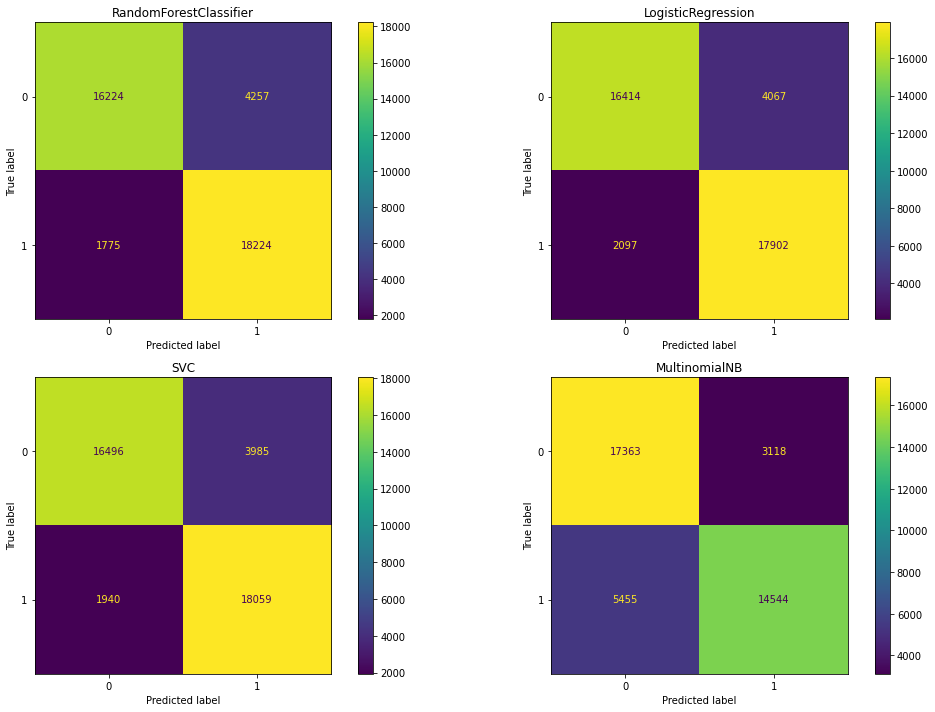

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

classifiers = [rf, lr, svm, mnb]

count = 0
for cls, ax in zip(classifiers, axes.flatten()):
    if count == len(classifiers):
        break

    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax)
    ax.title.set_text(type(cls).__name__)
    count += 1
plt.tight_layout()  
plt.show()

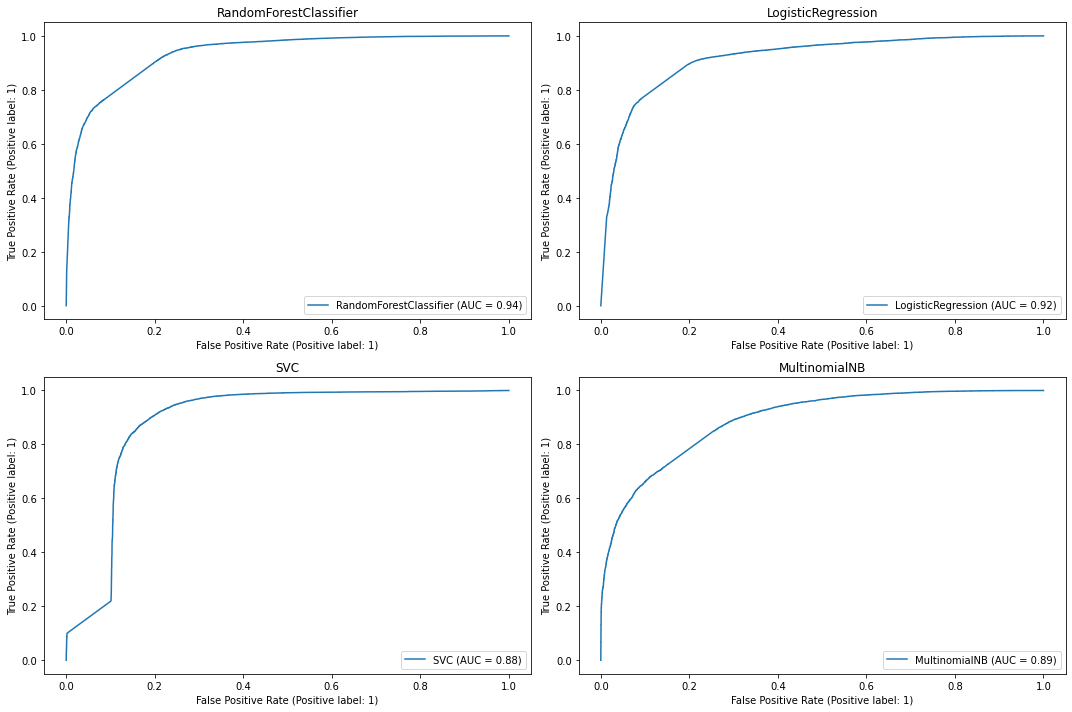

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

classifiers = [rf, lr, svm, mnb]

count = 0
for clf, ax in zip(classifiers, axes.flatten()):
    plot_roc_curve(clf, X_test, y_test, ax = ax) 
    ax.title.set_text(type(clf).__name__)
    count += 1
plt.tight_layout()  
plt.show()

In [57]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 7.8 MB/s 
     |████████████████████████████████| 67 kB 6.2 MB/s 
     |████████████████████████████████| 6.5 MB 66.3 MB/s 
     |████████████████████████████████| 596 kB 64.2 MB/s 
     |████████████████████████████████| 895 kB 73.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [58]:
!pip3 install emoji

     |████████████████████████████████| 175 kB 8.1 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=bc7e3feb50f76b9a19c75f98ea9f3cf313fd5f9c4abef7d1ef69f84f7a0cdbb7
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [59]:
from transformers import pipeline

In [ ]:
# we want to use a tweet-specific BERT model for sentiment analysis
pipe = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

Downloading:   0%|          | 0.00/987 [00:00<?, ?B/s]

In [ ]:
# label the row with 'error' if the length is too long for BERT
sent = []
sent_score = []
count = 0
for i in df_balanced.iloc:
  print(count)
  count+=1
  try:
    result = pipe(i.text)
    sent.append(result[0]['label'])
    sent_score.append(result[0]['score'])
  except:
    sent.append('error')
    sent_score.append('0')

Streaming output truncated to the last 5000 lines.
114558
114559
114560
114561
114562
114563
114564
114565
114566
114567
114568
114569
114570
114571
114572
114573
114574
114575
114576
114577
114578
114579
114580
114581
114582
114583
114584
114585
114586
114587
114588
114589
114590
114591
114592
114593
114594
114595
114596
114597
114598
114599
114600
114601
114602
114603
114604
114605
114606
114607
114608
114609
114610
114611
114612
114613
114614
114615
114616
114617
114618
114619
114620
114621
114622
114623
114624
114625
114626
114627
114628
114629
114630
114631
114632
114633
114634
114635
114636
114637
114638
114639
114640
114641
114642
114643
114644
114645
114646
114647
114648
114649
114650
114651
114652
114653
114654
114655
114656
114657
114658
114659
114660
114661
114662
114663
114664
114665
114666
114667
114668
114669
114670
114671
114672
114673
114674
114675
114676
114677
114678
114679
114680
114681
114682
114683
114684
114685
114686
114687
114688
114689
114690
114691
114692
1146

In [ ]:
df_balanced['sent'] = sent
df_balanced['sent_score'] = sent_score

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_balanced.to_csv('/content/drive/MyDrive/final project data/df_balanced_sent.csv')

In [ ]:
df_balanced = pd.read_csv('/content/drive/MyDrive/final project data/df_balanced_sent.csv')

In [ ]:
# drop error rows
df_balanced = df_balanced[df_balanced['sent'] != 'error']

In [ ]:
before = df_balanced[df_balanced['after'] == 0]
before.sent.value_counts()

NEG    31961
NEU    20512
POS     7305
Name: sent, dtype: int64

In [ ]:
after = df_balanced[df_balanced['after'] == 1]
after.sent.value_counts()

NEG    26934
NEU    21588
POS    11253
Name: sent, dtype: int64

In [ ]:
before_groupby = before.groupby('g_publish_time').sent.value_counts()

In [ ]:
total_groupby = df_balanced.groupby('g_publish_time').sent.value_counts()

In [ ]:
total_groupby.keys()

MultiIndex([('2018-08-14', 'NEG'),
            ('2018-08-14', 'NEU'),
            ('2018-08-14', 'POS'),
            ('2018-08-15', 'NEG'),
            ('2018-08-15', 'NEU'),
            ('2018-08-15', 'POS'),
            ('2018-08-16', 'NEG'),
            ('2018-08-16', 'NEU'),
            ('2018-08-16', 'POS'),
            ('2018-08-17', 'NEG'),
            ...
            ('2022-03-07', 'POS'),
            ('2022-03-08', 'NEG'),
            ('2022-03-08', 'NEU'),
            ('2022-03-08', 'POS'),
            ('2022-03-09', 'NEU'),
            ('2022-03-09', 'NEG'),
            ('2022-03-09', 'POS'),
            ('2022-03-10', 'NEU'),
            ('2022-03-10', 'POS'),
            ('2022-03-13', 'POS')],
           names=['g_publish_time', 'sent'], length=3906)

In [ ]:
# get number of tweets for each sentiment on each day
sent_dict = {}
for key in total_groupby.keys():
  date = key[0]
  sent = key[1]
  if date not in sent_dict.keys():
    sent_dict[date] = {'pos':0, 'neg':0, 'neu':0}
  if sent == 'POS': 
    sent_dict[date]['pos'] = total_groupby[key]
  elif sent == 'NEG': 
    sent_dict[date]['neg'] = total_groupby[key]
  else: 
    sent_dict[date]['neu'] = total_groupby[key]


In [ ]:
# get proportion of each sentiment tweet
POS = []
NEG = []
NEU = []
Date = []
for key in sent_dict.keys():
  Date.append(key)
  pos_num = sent_dict[key]['pos']
  neg_num = sent_dict[key]['neg']
  neu_num = sent_dict[key]['neu']
  sum = pos_num + neg_num +neu_num
  POS.append(pos_num/sum)
  NEG.append(neg_num/sum)
  NEU.append(neu_num/sum)

In [ ]:
Date = list(range(len(Date)))

In [ ]:
sent_dict.keys()

dict_keys(['2018-08-14', '2018-08-15', '2018-08-16', '2018-08-17', '2018-08-18', '2018-08-19', '2018-08-20', '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24', '2018-08-25', '2018-08-26', '2018-08-27', '2018-08-28', '2018-08-29', '2018-08-30', '2018-08-31', '2018-09-01', '2018-09-02', '2018-09-03', '2018-09-04', '2018-09-05', '2018-09-06', '2018-09-07', '2018-09-08', '2018-09-09', '2018-09-10', '2018-09-11', '2018-09-12', '2018-09-13', '2018-09-14', '2018-09-15', '2018-09-16', '2018-09-17', '2018-09-18', '2018-09-19', '2018-09-20', '2018-09-21', '2018-09-22', '2018-09-23', '2018-09-24', '2018-09-25', '2018-09-26', '2018-09-27', '2018-09-28', '2018-09-29', '2018-09-30', '2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04', '2018-10-05', '2018-10-06', '2018-10-07', '2018-10-08', '2018-10-09', '2018-10-10', '2018-10-11', '2018-10-12', '2018-10-13', '2018-10-14', '2018-10-15', '2018-10-16', '2018-10-17', '2018-10-18', '2018-10-19', '2018-10-20', '2018-10-21', '2018-10-22', '2018-10-

In [ ]:
import numpy as np

No handles with labels found to put in legend.


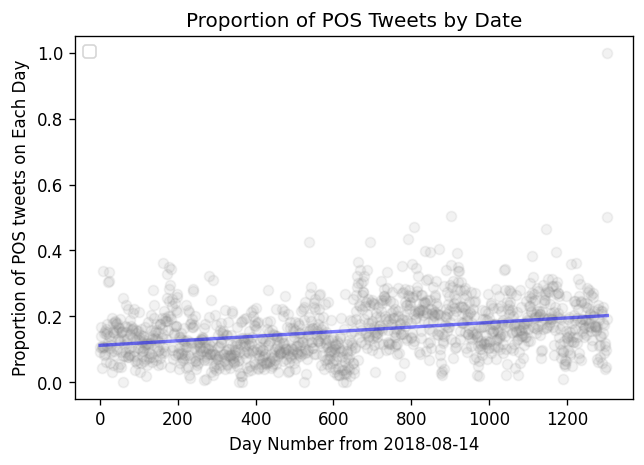

In [ ]:
Date = np.array(Date)
POS = np.array(POS)

plt.figure(dpi=120) 

x1 = Date[:653]
y1 = POS[:653]
x2 = Date[653:]
y2 = POS[653:]

plt.scatter(Date, POS, c = 'grey', alpha = 0.1)


#m1,b1 = np.polyfit(x1, y1, 1)

#plt.plot(x1, m1*x1 + b1,'--', label='2018-08-14 - Event', linewidth=2, c = 'b')

#m2,b2 = np.polyfit(x2, y2, 1)
#plt.plot(x2, m2*x2 + b2, '--', label='Event - 2022-03-13', linewidth=2, c = 'b')

m,b = np.polyfit(Date, POS, 1)
plt.plot(Date, m*Date + b, linewidth=2, c = 'b', alpha = 0.5)

#plt.axvline(Date[653], ymin = 0.03, ymax = 0.97, label = 'Date of the Event')

plt.xlabel('Day Number from 2018-08-14')
plt.ylabel('Proportion of POS tweets on Each Day')
plt.legend(loc = 'upper left')
plt.title('Proportion of POS Tweets by Date')
plt.savefig('POS')
plt.show()


No handles with labels found to put in legend.


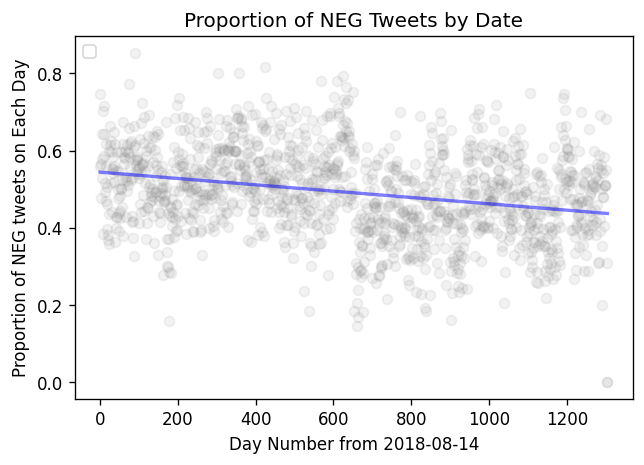

In [ ]:
Date = np.array(Date)
NEG = np.array(NEG)

plt.figure(dpi=120) 

x1 = Date[:653]
y1 = NEG[:653]
x2 = Date[653:]
y2 = NEG[653:]

plt.scatter(Date, NEG, c = 'grey', alpha = 0.1)


#m1,b1 = np.polyfit(x1, y1, 1)

#plt.plot(x1, m1*x1 + b1,'--', label='2018-08-14 - Event', linewidth=2, c = 'b')

#m2,b2 = np.polyfit(x2, y2, 1)
#plt.plot(x2, m2*x2 + b2, '--', label='Event - 2022-03-13', linewidth=2, c = 'b')

m,b = np.polyfit(Date, NEG, 1)
plt.plot(Date, m*Date + b, linewidth=2, c = 'b', alpha = 0.5)

#plt.axvline(Date[653], ymin = 0.03, ymax = 0.97, label = 'Date of the Event')

plt.xlabel('Day Number from 2018-08-14')
plt.ylabel('Proportion of NEG tweets on Each Day')
plt.legend(loc = 'upper left')
plt.title('Proportion of NEG Tweets by Date')
plt.savefig('NEG')
plt.show()


No handles with labels found to put in legend.


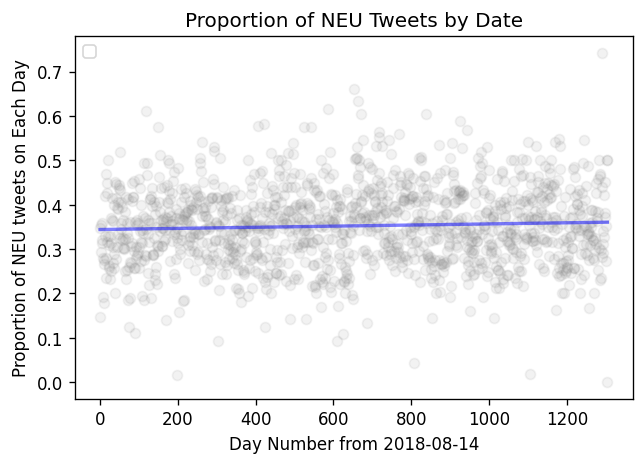

In [ ]:
Date = np.array(Date)
NEU = np.array(NEU)

plt.figure(dpi=120) 

x1 = Date[:653]
y1 = NEU[:653]
x2 = Date[653:]
y2 = NEU[653:]

plt.scatter(Date, NEU, c = 'grey', alpha = 0.1)


#m1,b1 = np.polyfit(x1, y1, 1)

#plt.plot(x1, m1*x1 + b1,'--', label='2018-08-14 - Event', linewidth=2, c = 'b')

#m2,b2 = np.polyfit(x2, y2, 1)
#plt.plot(x2, m2*x2 + b2, '--', label='Event - 2022-03-13', linewidth=2, c = 'b')

m,b = np.polyfit(Date, NEU, 1)
plt.plot(Date, m*Date + b, linewidth=2, c = 'b', alpha = 0.5)

#plt.axvline(Date[653], ymin = 0.03, ymax = 0.97, label = 'Date of the Event')

plt.xlabel('Day Number from 2018-08-14')
plt.ylabel('Proportion of NEU tweets on Each Day')
plt.legend(loc = 'upper left')
plt.title('Proportion of NEU Tweets by Date')
plt.savefig('NEU')
plt.show()


In [61]:
# get sentence tokenizations
df_balanced['tokenized_sents'] = df_balanced['text'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
df_balanced['normalized_sents'] = df_balanced['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [63]:
df_balanced.to_pickle('/content/drive/MyDrive/final project data/df_balanced_sentnormalized.pkl')

In [66]:
before = df_balanced[df_balanced['after'] == 0].normalized_sents
after = df_balanced[df_balanced['after'] == 1].normalized_sents

In [ ]:
beforeW2V = gensim.models.word2vec.Word2Vec(before.sum(), sg = 0)

In [69]:
afterW2V = gensim.models.word2vec.Word2Vec(after.sum(), sg = 0)

In [70]:
# words to create dimensions
dfTargetWords = ['peace', 'calm', 'peaceful', 'love', 'violent', 'violence', 'brutal', 'aggressive']
# words we will be mapping
dfTargetWords += ['blm', 'police', 'cop', 'black', 'white', 'support']

In [71]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector


def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

In [ ]:
peace_or_violent = dimension(beforeW2V.wv, ['peace', 'calm', 'peaceful', 'love'], ['violent', 'violence', 'brutal', 'aggressive'])

In [72]:
def makeDF(model, word_list):
    d_i = []
    for word in word_list:
        d_i.append(sklearn.metrics.pairwise.cosine_similarity(model.wv[word].reshape(1, -1), peace_or_violent.reshape(1, -1))[0][0])
    df = pd.DataFrame({'peace_or_violent': d_i}, index = word_list)
    return df

In [73]:
wordlist = ['blm', 'police', 'cop', 'black', 'white', 'support']

In [74]:
import sklearn.metrics

In [ ]:
plot1df = makeDF(beforeW2V.wv, wordlist)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the

In [ ]:
plot1df

,peace_or_violent
blm,0.082378
police,-0.414189
cop,-0.456075
black,-0.019801
white,-0.286222
support,0.135699


In [75]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], fontsize = 15)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())
    plt.savefig('peace_or_violent_before')

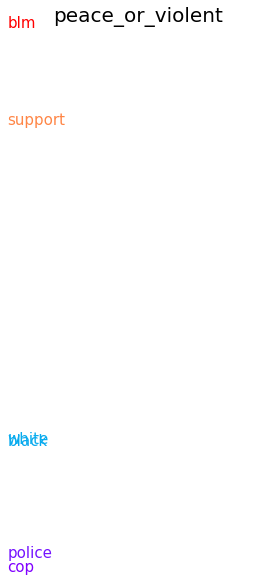

In [ ]:
fig = plt.figure(figsize = (16,10))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, plot1df, 'peace_or_violent')


In [76]:
peace_or_violent = dimension(afterW2V.wv, ['peace', 'calm', 'peaceful', 'love'], ['violent', 'violence', 'brutal', 'aggressive'])

In [77]:
plot2df = makeDF(afterW2V.wv, wordlist)

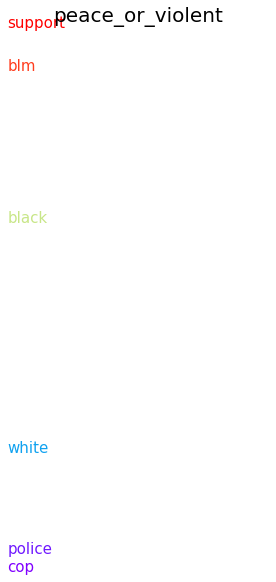

In [78]:
fig = plt.figure(figsize = (16,10))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, plot2df, 'peace_or_violent')

In [ ]:
df_before = df_balanced[df_balanced['after'] == 0]
df_after = df_balanced[df_balanced['after'] == 1]

In [ ]:
import matplotlib.pyplot as plt

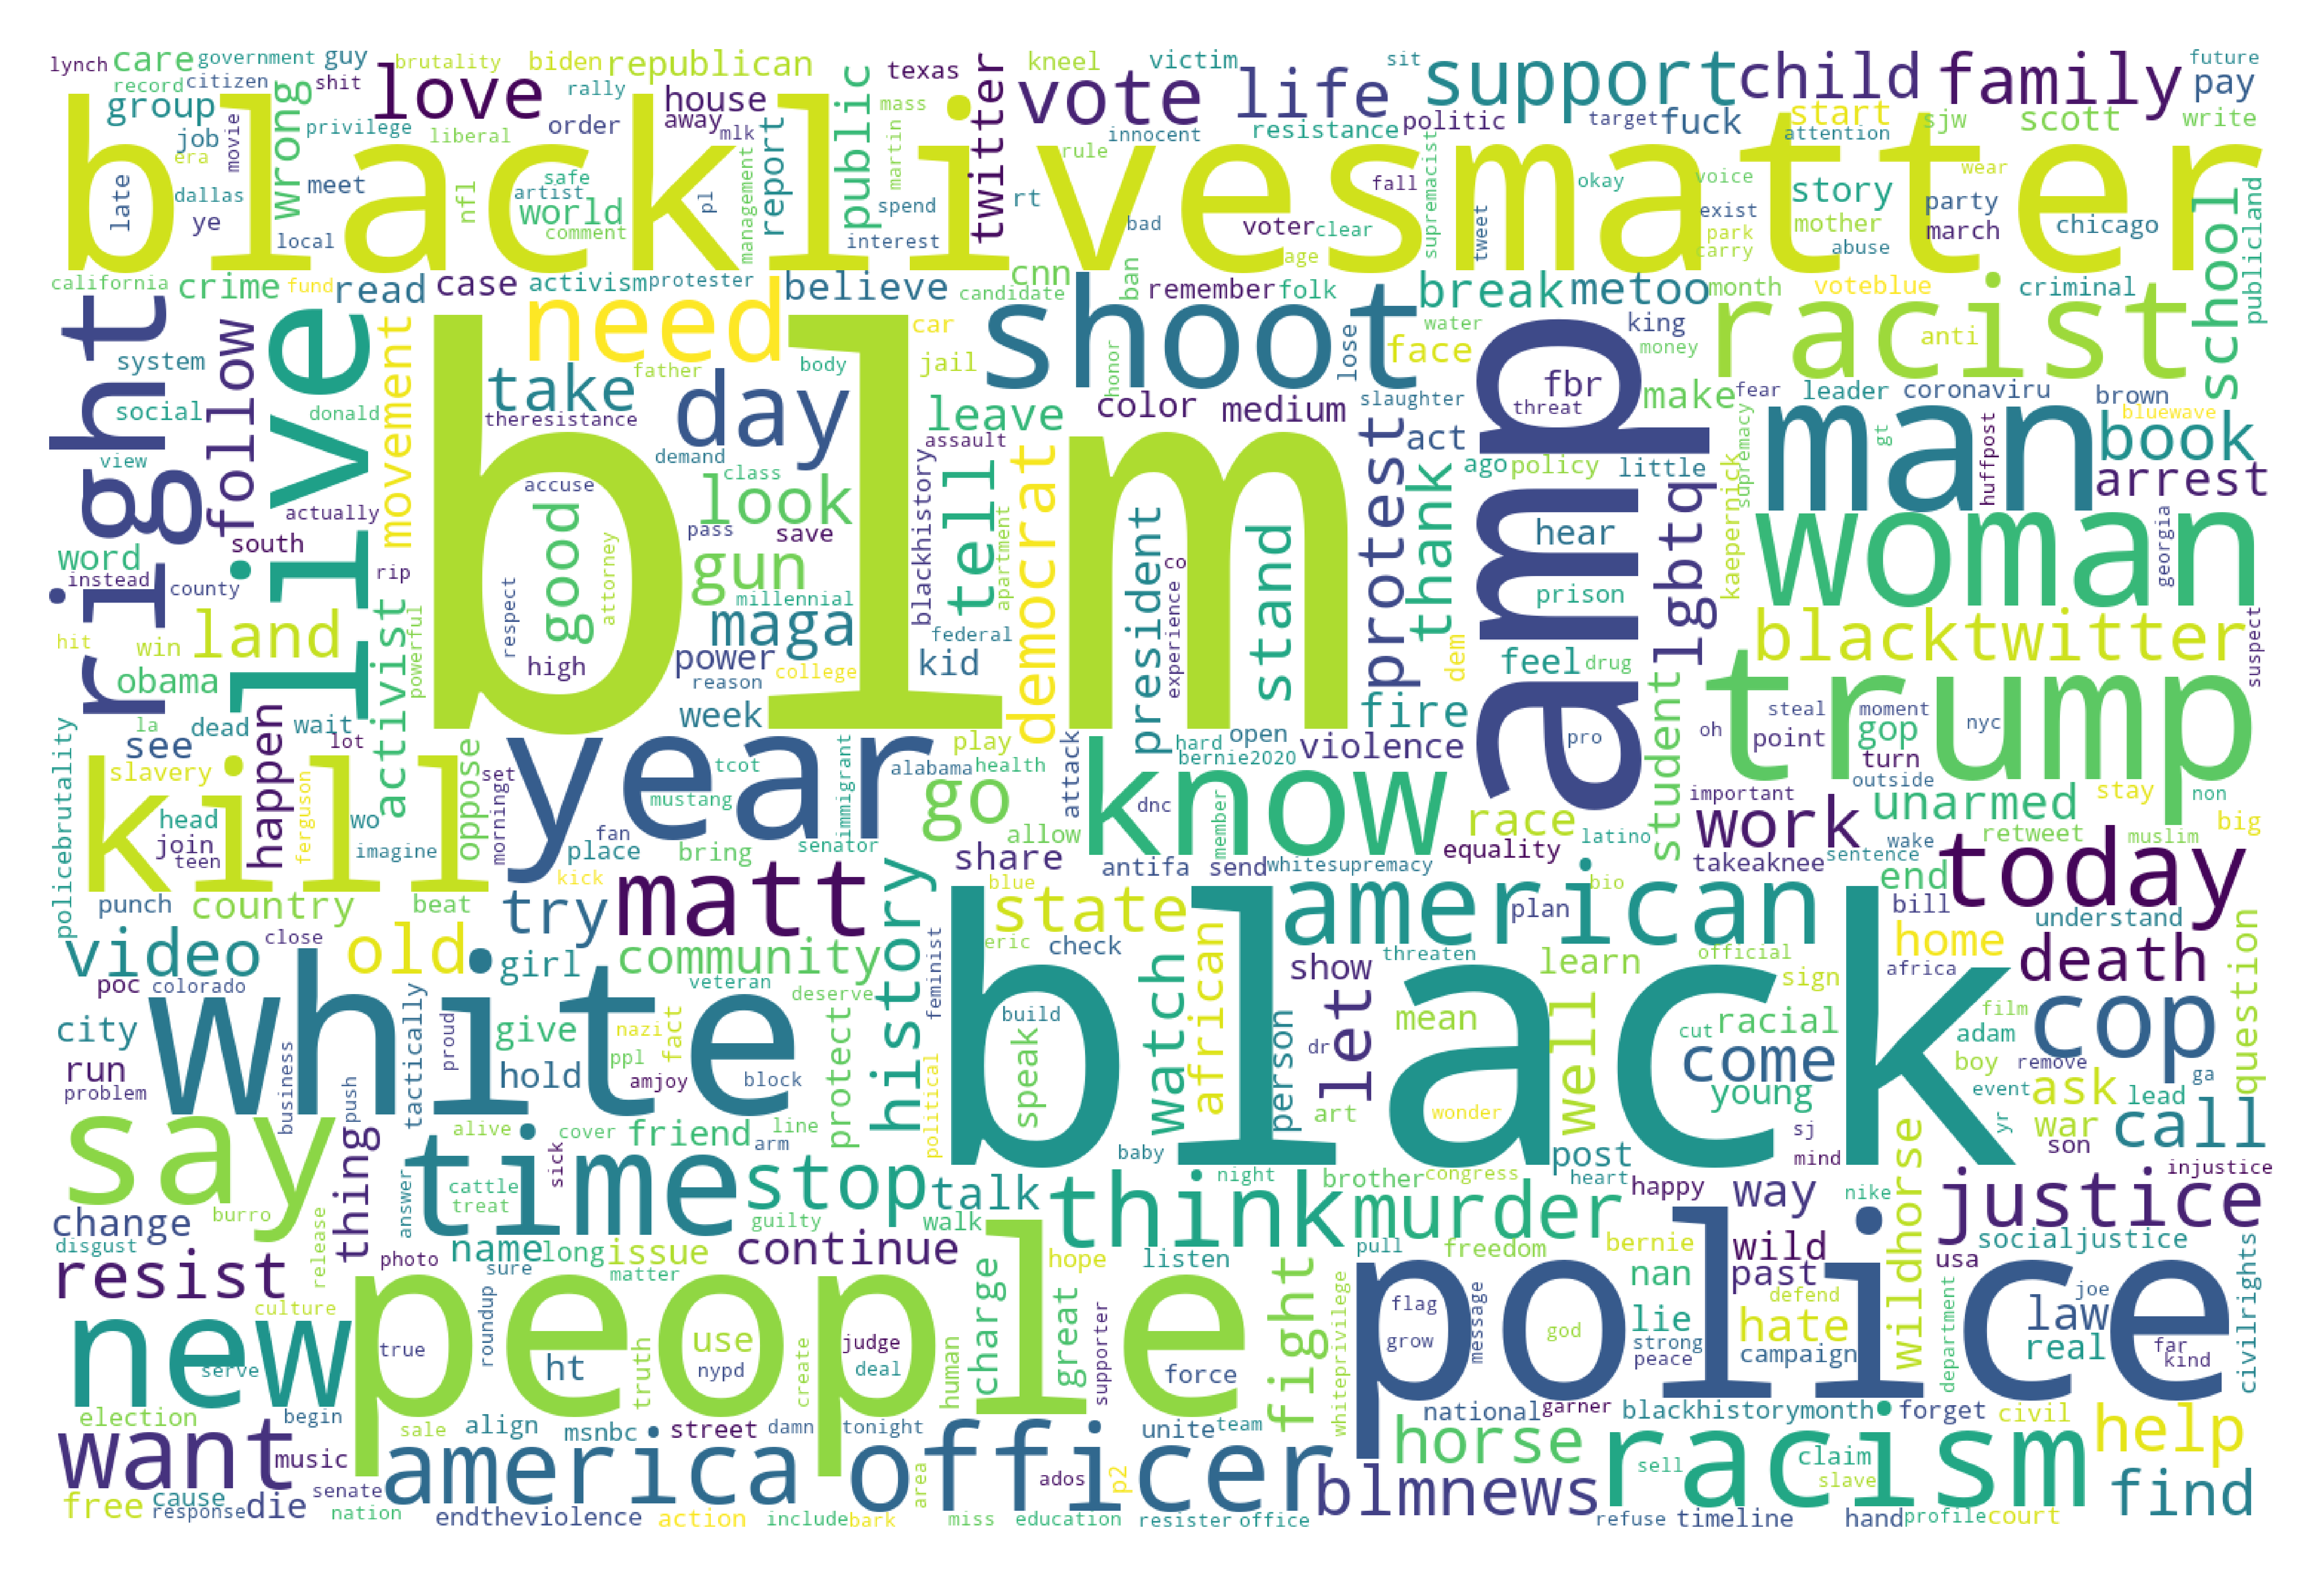

In [ ]:
wc_before = wordcloud.WordCloud(background_color="white", max_words=500, width=3000, height=2000, mode='RGBA', collocations=False, scale=.5).generate(' '.join(df_before['normalized_text'].sum()))
plt.figure(dpi = 1200)
plt.imshow(wc_before)
plt.axis("off")
plt.savefig("#BLM Tweets before 2020-05-25")

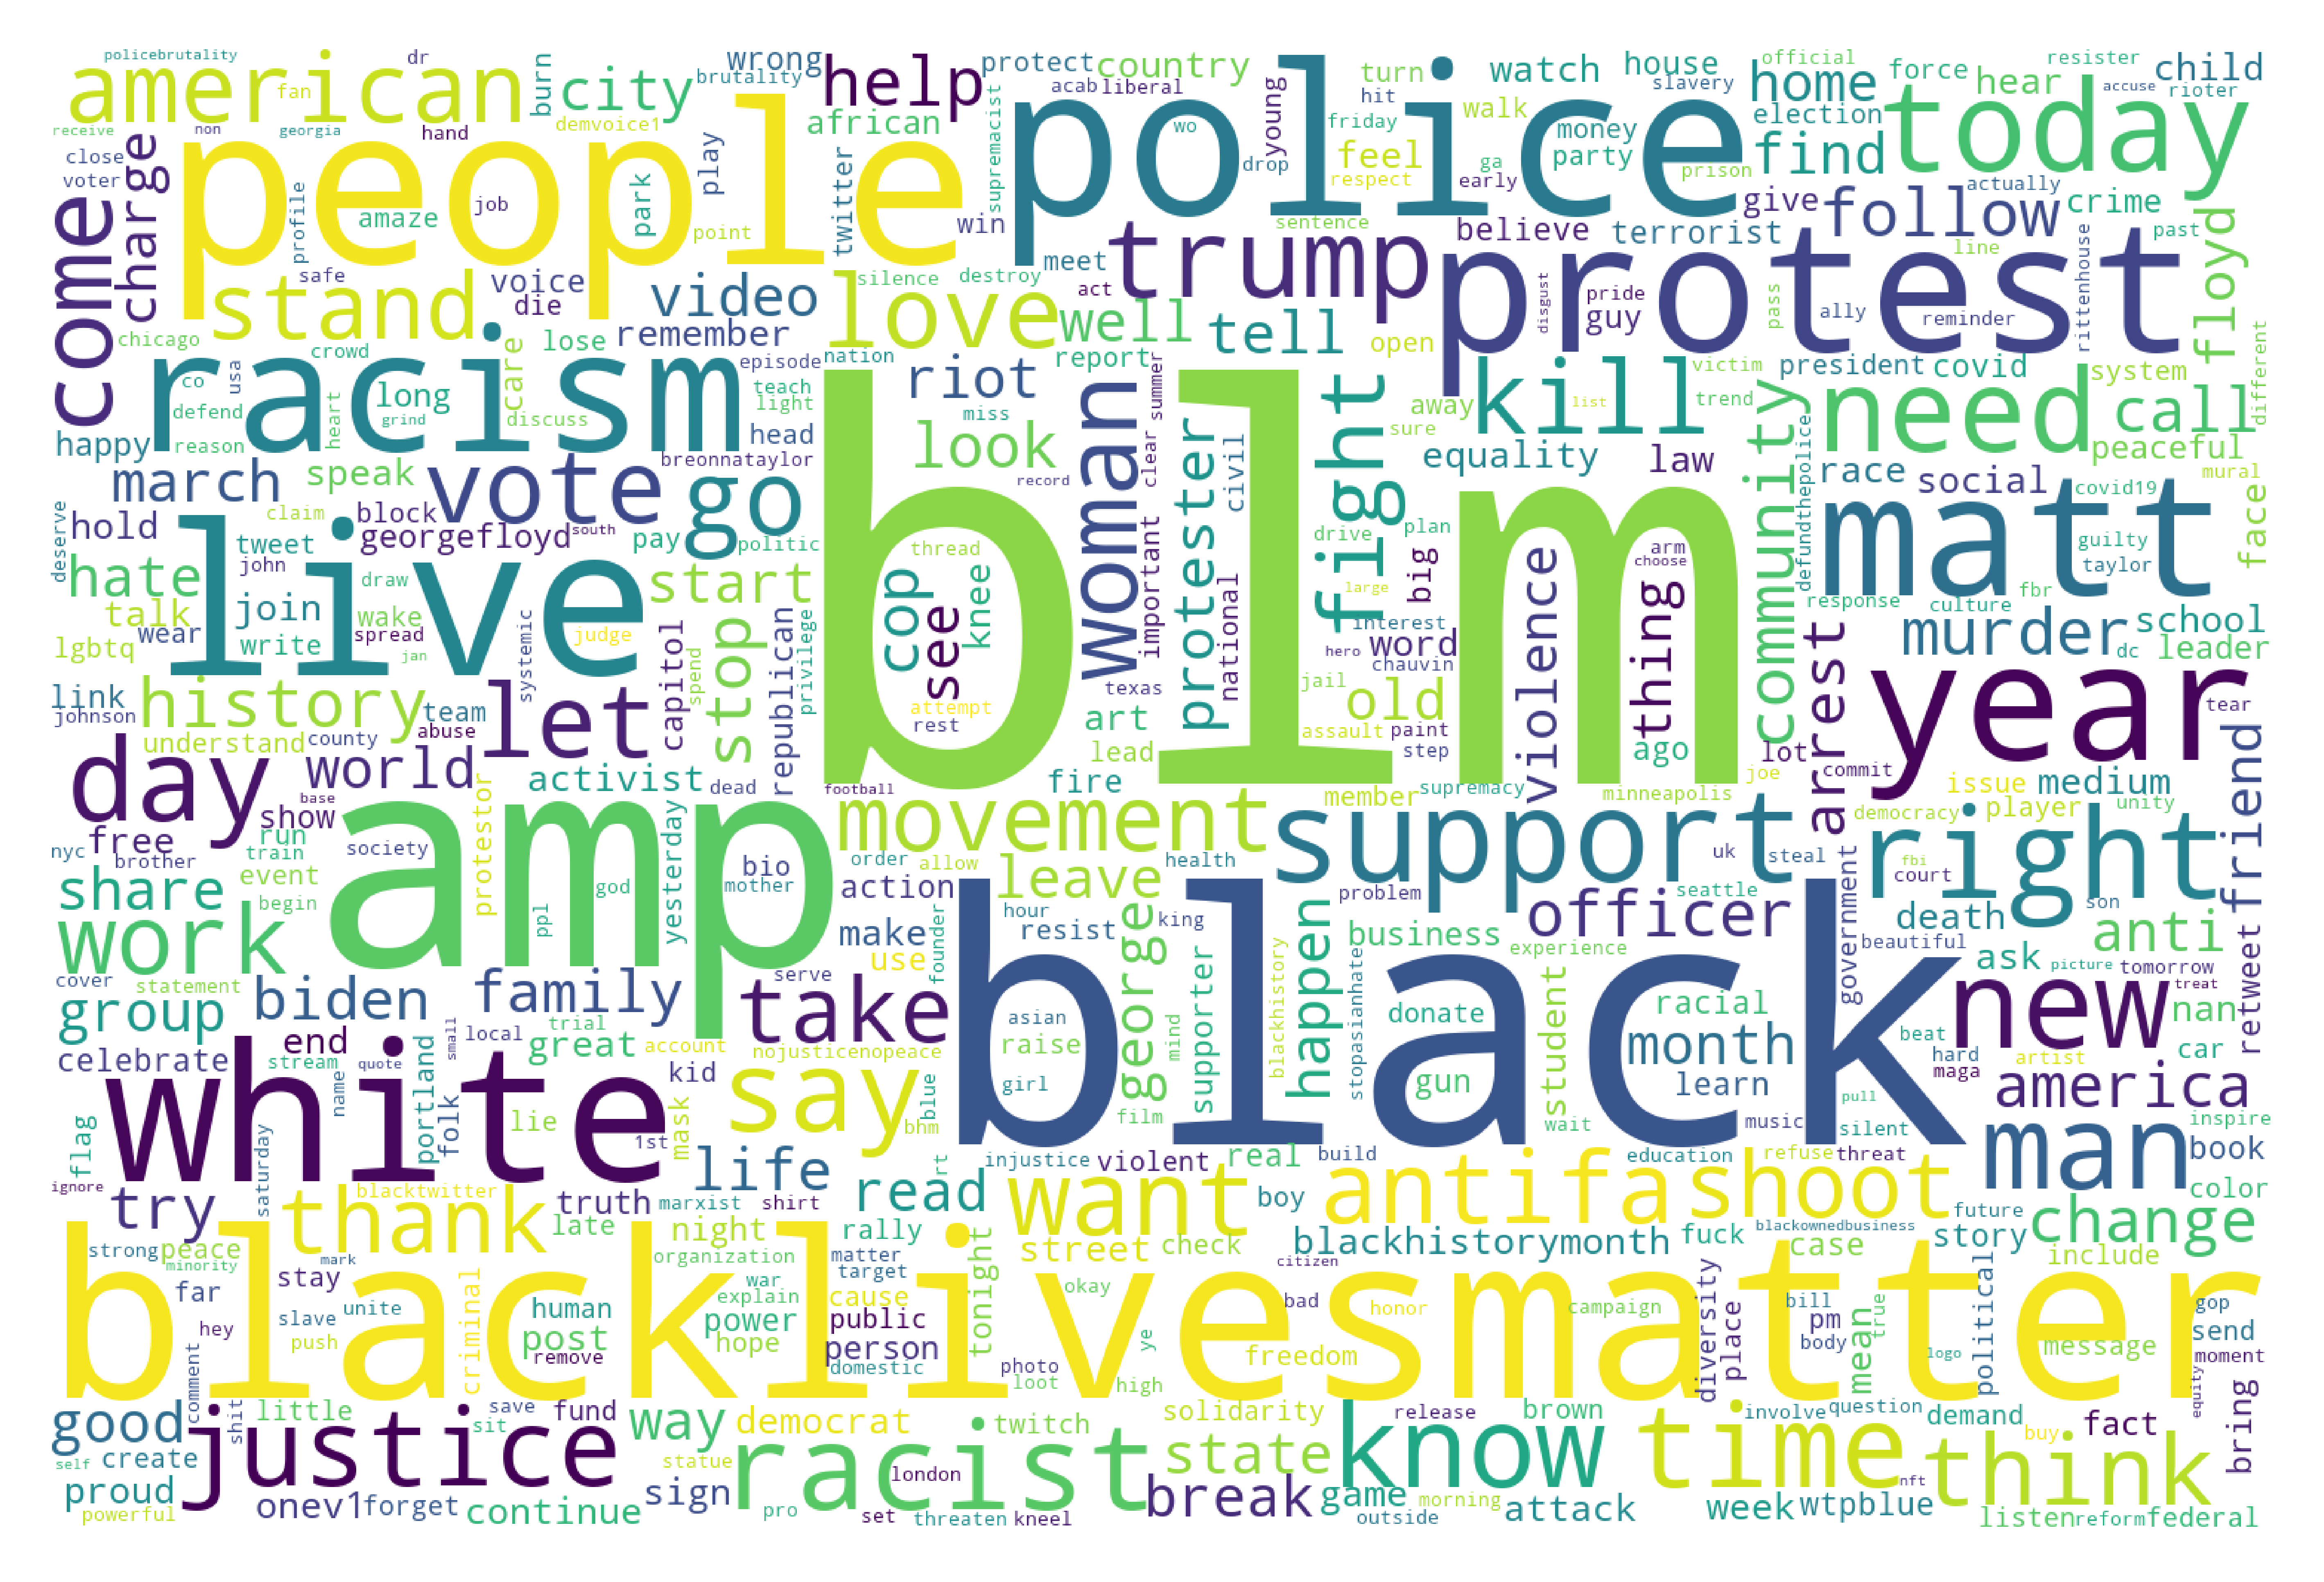

In [ ]:
wc_after = wordcloud.WordCloud(background_color="white", max_words=500, width=3000, height=2000, mode='RGBA', collocations=False, scale=.5).generate(' '.join(df_after['normalized_text'].sum()))
plt.figure(dpi = 1200)
plt.imshow(wc_after)
plt.axis("off")
plt.savefig("#BLM Tweets after 2020-05-25")

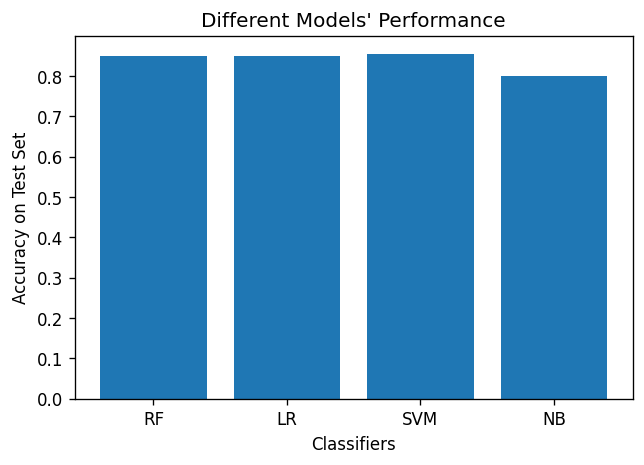

In [ ]:
import matplotlib.pyplot as plt

scores = [0.851, 0.850, 0.856, 0.800]
clfs = ['RF', 'LR', 'SVM', 'NB']

plt.figure(dpi = 120)
plt.bar(clfs, scores)
plt.title("Different Models' Performance")
plt.xlabel('Classifiers')
plt.ylabel('Accuracy on Test Set')
plt.savefig('acc')